Building prefix dict from C:\Anaconda\lib\site-packages\jieba-0.37-py2.7.egg\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Anaconda\lib\site-packages\jieba-0.37-py2.7.egg\jieba\dict.txt ...
Loading model from cache c:\users\tiantian\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\tiantian\appdata\local\temp\jieba.cache
Loading model cost 0.363 seconds.
DEBUG:jieba:Loading model cost 0.363 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


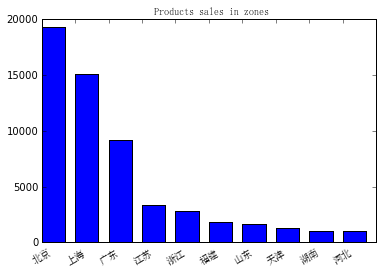

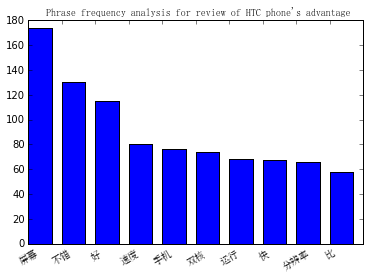

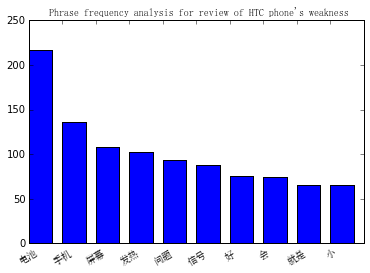

['1', '3', '2', '5', '4']
[15, 39, 18, 68, 161]


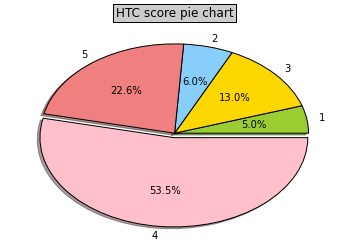

('Time used:', 5.847752286856741)


In [1]:
#coding=utf-8
# -*- coding: UTF-8 -*-
# Create graph
import pandas as pd
import xlrd
import jieba
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import time
start = time.clock()
data2 = xlrd.open_workbook('5 mobile phone review.xlsx')
data3=xlrd.open_workbook('Reviews.xls')
table3=data3.sheet_by_index(0)
table1 =  data2.sheet_by_index(0)
table2 =  data2.sheet_by_index(3)
font = matplotlib.font_manager.FontProperties(fname='c:\\windows\\fonts\\simsun.ttc')
blacklist = [u'看似', u'买', u'这本', u'(', u'其', u'。', u'！', u'，', u'.', u'应',
             u'是', u'也', u'上', u'后', u')', u'还是', u'再', u',', u'看', u'因为', u'没', u'但', u'像',
             u'更', u'用', u'“', u'这', u'有', u'在', u'去', u'都', u'”', u'还', u'使', u'，', u'把', u'向',
             u'没有', u'新', u'对', u'　', u' ', u'）', u'、', u'。', u';', u'%', u'：', u'?', u'（', u'的',
             u'和', u'了', u'等', u'将', u'到', u'',  u'可以',  u'通过',u'从', u'我', u'说', u'要', u'并', u'就', u'不', u'为', u'2', u'号', u'日', u'大',u'很']
# All products sales in zones analysis
hist12 = {}
for cont1 in table3.col_values(4):
    for x1 in jieba.cut(cont1):
        if x1 in blacklist:
            continue
        hist12[x1] = hist12.get(x1, 0) + 1
    
hist12_sorted = sorted(hist12.iteritems(), key=lambda d: d[1], reverse=True)
bar_width = 0.7
plt.bar(range(10), [hist12_sorted[i][1] for i in range(10)],bar_width)
plt.xticks(range(10), [hist12_sorted[i][0] for i in range(10)], fontproperties=font,rotation=30)
plt.title(u" Products sales in zones" ,fontproperties=font)
plt.show()

# HTC mobile advantages review analysis  
hist1 = {}
for cont in table1.col_values(4):
    for x in jieba.cut(cont):
        if x in blacklist:
            continue
        hist1[x] = hist1.get(x, 0) + 1
    
hist1_sorted = sorted(hist1.iteritems(), key=lambda d: d[1], reverse=True)
bar_width = 0.7
plt.bar(range(10), [hist1_sorted[i][1] for i in range(10)],bar_width)
plt.xticks(range(10), [hist1_sorted[i][0] for i in range(10)], fontproperties=font,rotation=30)
plt.title(u" Phrase frequency analysis for review of HTC phone's advantage" ,fontproperties=font)
plt.show()


# HTC mobile weakness review analysis
hist2 = {}
for cont in table1.col_values(5):
    for x in jieba.cut(cont):
        if x in blacklist:
            continue
        hist2[x] = hist2.get(x, 0) + 1
    
hist2_sorted = sorted(hist2.iteritems(), key=lambda d: d[1], reverse=True)
bar_width = 0.7
plt.bar(range(10), [hist2_sorted[i][1] for i in range(10)],bar_width)
plt.xticks(range(10), [hist2_sorted[i][0] for i in range(10)], fontproperties=font,rotation=30)
plt.title(u" Phrase frequency analysis for review of HTC phone's weakness " ,fontproperties=font)
plt.show()


# HTC score summary analysis 
hh1 = {}
for rate in table1.col_values(2):
    a=0
    if rate==5:
        hh1['5']=hh1.get('5',0)+1
    elif rate==4:
        hh1['4']=hh1.get("4",0)+1
    elif rate==3:
        hh1['3']=hh1.get('3',0)+1
    elif rate==2:
        hh1['2']=hh1.get('2',0)+1
    elif rate==1:
        hh1['1']=hh1.get('1',0)+1
hh1_sorted = sorted(hh1.iteritems(), key=lambda d: d[1], reverse=True)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','pink']
print(hh1.keys())
print(hh1.values())
explode=(0, 0, 0, 0,0.05)
plt.pie(hh1.values(),explode=explode,colors=colors,labels=hh1.keys(), autopct='%1.1f%%', shadow=True)
plt.title('HTC score pie chart', bbox={'facecolor':'0.8', 'pad':5})
plt.show()
elapsed = (time.clock() - start)
print("Time used:",elapsed)